# Efficient Tokenization with Byte Pair Encoding (BPE) for Neural Networks

When working with neural networks for natural language processing (NLP), one of the key challenges is handling words that your model hasn't encountered before. Traditional word-level tokenization, which splits text into individual words, struggles with this because if a model encounters an unknown word during training, it can't process it properly. This is where Byte Pair Encoding (BPE) comes in.

BPE is a powerful technique used to break words into smaller, more manageable parts called subwords. This approach ensures that your model can still process rare or new words by breaking them down into familiar components. Today, we'll dive deep into BPE, explain how it works, and show you how to use it in Python to tokenize and encode text

## Why Do We Need Subword Tokenization?

Let's start with why subword tokenization is important.

When we tokenize text at the word level, each word is treated as a separate token. This is simple, but it creates a big problem: out-of-vocabulary words. If the model encounters a word it hasn't seen during training (e.g., "unbelievable" in a chatbot trained on news articles), it will fail to process the word.

With subword tokenization, we break words into smaller pieces, called subwords. This way, even if the model doesn't know a word, it can split the word into known parts and still capture its meaning.

For example, consider the word "unbelievable":
- A word-level tokenizer might fail if "unbelievable" is missing from the model's vocabulary.
- Subword tokenization would break the word into smaller chunks like "un", "believ", and "able". This allows the model to process the word, even if it hasn't seen the entire word before.

## What Is Byte Pair Encoding (BPE)?

Byte Pair Encoding (BPE) is an algorithm that builds a vocabulary of subwords by merging the most frequent pairs of characters in the text. The idea is simple: start with characters, merge the most common pairs into larger subwords, and repeat this process until you have a vocabulary of subwords that balance the need for common words and rare subwords.

Here's how BPE works:
- Start with characters: Every word is treated as a sequence of characters.

Example: "unbelievable" → ['u', 'n', 'b', 'e', 'l', 'i', 'e', 'v', 'a', 'b', 'l', 'e']

- Merge frequent pairs: The algorithm identifies the most frequent pair of characters and merges them into a subword.
After merging: ['un', 'believ', 'able']

- Repeat: Continue merging frequent characters and subwords until you reach the desired vocabulary size.
- Assign IDs (encoding): Each subword is assigned a unique numerical ID.
In essence, BPE does both tokenization and encoding in one step. The text is broken down into subwords and these subwords are assigned numerical IDs, which are the "encoded" representations of the subwords.

## Why Use BPE for Tokenization?

Compared to word-level tokenization, BPE has several advantages:

- Handles rare words: Instead of treating rare words as unknown, BPE breaks them down into familiar subwords. This ensures the model can process any word, even if it's uncommon or new.
- Smaller vocabulary: Since BPE uses subwords, you don't need a huge vocabulary of entire words. This reduces the memory footprint and computational cost.
- Balances efficiency: By merging frequent character pairs, BPE ensures that common words stay as single tokens, while rare words are split into subwords.

## How BPE Works in Practice

Let's look at a real-world example of BPE in action. We'll use the tiktoken library (used in models like GPT) to tokenize and encode text using BPE.

Install the tiktoken Library

If you haven't already installed tiktoken, you can do so with the following command:

In [4]:
%pip install tiktoken

Note: you may need to restart the kernel to use updated packages.


Tokenizing and Encoding Text with BPE

In this example, we'll tokenize and encode a sentence that contains both common and complex words. BPE will split rare words into subwords and handle common words as single tokens.

In [5]:
import tiktoken

# Initialize the Byte Pair Encoding tokenizer for GPT-2
tokenizer = tiktoken.get_encoding("gpt2")

# Define a sample text with complex and simple words
text = "unbelievable amazingness AI revolutionizing technologies"

# Encode the text using BPE (this includes both tokenization and encoding)
token_ids = tokenizer.encode(text)
print("Token IDs:", token_ids)

# Decode the token IDs back into subwords to show what BPE has done
decoded_tokens = [tokenizer.decode([token_id]) for token_id in token_ids]
print("Subwords:", decoded_tokens)

Token IDs: [403, 6667, 11203, 540, 4998, 1108, 9552, 5854, 2890, 8514]
Subwords: ['un', 'bel', 'iev', 'able', ' amazing', 'ness', ' AI', ' revolution', 'izing', ' technologies']


## What's Happening Here:

- The word "unbelievable" was broken down into "un", "believ", and "able". This is an example of how BPE splits a complex word into known subwords.
- The word "AI" remained a single token since it's common and recognizable.
- The word "revolutionizing" was split into "revol", "ution", and "izing", allowing the model to understand its components.

## Why Is BPE Effective?
BPE is widely used in modern NLP models because it can balance the need for compact tokenization while still being able to handle unknown or rare words.
Handles out-of-vocabulary words: Since BPE breaks down rare words into smaller, familiar subwords, it ensures that the model can process words it hasn't seen during training.
Reduces vocabulary size: By focusing on subwords rather than full words, BPE helps reduce the overall vocabulary size, making the model more efficient.
Efficient training: Smaller vocabularies and the ability to process any word (via subwords) lead to faster, more efficient model training.

# Key Takeaways

- BPE (Byte Pair Encoding) is a powerful method for tokenizing and encoding text, used in many NLP models.
- By breaking words into subwords, BPE ensures that rare or unknown words can still be processed by the model.
- Encoding in BPE refers to both tokenization and assigning numerical IDs to subwords. This allows neural networks to understand and process language effectively.
- Using the tiktoken library, you can easily implement BPE tokenization in your projects to handle complex and diverse language data.

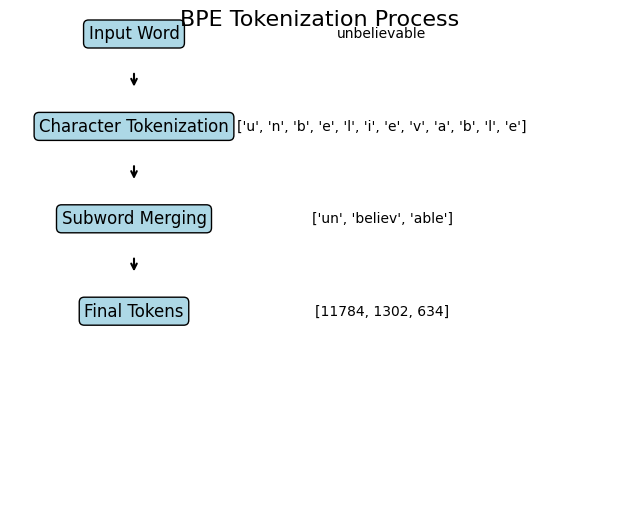

In [6]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define the process steps and examples
steps = [
    ("Input Word", "unbelievable"),
    ("Character Tokenization", "['u', 'n', 'b', 'e', 'l', 'i', 'e', 'v', 'a', 'b', 'l', 'e']"),
    ("Subword Merging", "['un', 'believ', 'able']"),
    ("Final Tokens", "[11784, 1302, 634]")
]

# Add the boxes and examples
for i, (title, example) in enumerate(steps):
    y_pos = 1 - i * 0.2
    ax.text(0.2, y_pos, title, ha='center', va='center', 
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))
    ax.text(0.6, y_pos, example, ha='center', va='center', fontsize=10)

# Draw arrows between each step
for i in range(len(steps) - 1):
    ax.annotate("", xy=(0.2, 1 - (i+1)*0.2 + 0.08), xytext=(0.2, 1 - i*0.2 - 0.08),
                arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# Remove axes and show the diagram
ax.axis('off')
plt.title("BPE Tokenization Process", fontsize=16)
plt.show()
